In [1]:
from utilities.io_tools import input_tools
from wums import plot_tools,boostHistHelpers as hh
from wremnants import theory_corrections
import numpy as np
import hist
import matplotlib.pyplot as plt
from scipy.interpolate import make_smoothing_spline
from scripts.corrections.make_theory_corr import read_corr

In [2]:
%load_ext autoreload
%autoreload 2

In [142]:
scetlib_nnlojet_n4lln3lo = input_tools.read_matched_scetlib_nnlojet_hist(
    "/home/k/kelong/work/Generators/TheoryCorrections/SCETlib/ct18z_nplambda_n4+0ll/inclusive_Z_CT18Z_nplambda_N4+0LL_combined.pkl",
    "/home/k/kelong/work/Generators/TheoryCorrections/SCETlib/ct18z_nplambda_n4+0ll/inclusive_Z_CT18Z_nplambda_n3lo_sing.pkl",
    "/home/k/kelong/work/Generators/TheoryCorrections/NNLOjet/Z/ZjNNLO/final/ptz",
    zero_nons_bins=hist.tag.Slicer()[0:2],
    axes=("Y", "qT"),
)

In [149]:
scetlib_nnlojet_n4lln3lo_sm = input_tools.read_matched_scetlib_nnlojet_hist(
    "/home/k/kelong/work/Generators/TheoryCorrections/SCETlib/ct18z_nplambda_n4+0ll/inclusive_Z_CT18Z_nplambda_N4+0LL_combined.pkl",
    "/home/k/kelong/work/Generators/TheoryCorrections/SCETlib/ct18z_nplambda_n4+0ll/inclusive_Z_CT18Z_nplambda_n3lo_sing.pkl",
    "/home/k/kelong/work/Generators/TheoryCorrections/NNLOjet/Z/ZjNNLO/final/ptz",
    axes=("Y", "qT"),
    zero_nons_bins=hist.tag.Slicer()[0:2],
    smooth_nnlojet=True,
)

2 30


In [131]:
scetlib_dyturbo_n4ll_nnlo = read_corr("Z", "scetlib_dyturbo", 
    ["/home/k/kelong/work/Generators/TheoryCorrections/SCETlib/ct18z_nplambda_n4+0ll/inclusive_Z_CT18Z_nplambda_N4+0LL_combined.pkl",
        "/home/k/kelong/work/Generators/TheoryCorrections/SCETlib/ct18z_nplambda_scalevars/inclusive_Z_CT18Z_nplambda_scalevars_nnlo_sing_combined.pkl",
        "/home/k/kelong/work/Generators/TheoryCorrections/DYTURBO/nnlo-scetlibmatch/scalevariations/z0/results_z-2d-nnlo-vj-CT18ZNNLO-{scale}-scetlibmatch.txt",
    ],
    ["Y", "qT"]
)

In [70]:
scetlib_nnlojet_n4lln3lo.project("Y")

(32,)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f743111cd10>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

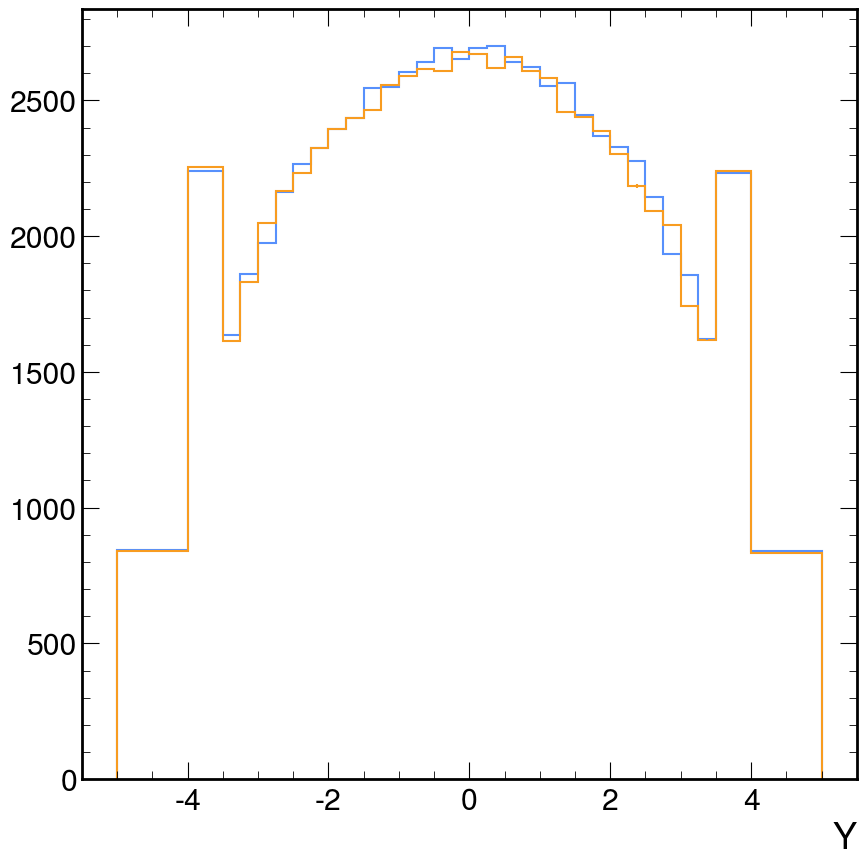

In [121]:
scetlib_nnlojet_n4lln3lo_sm.project("Y").plot()
scetlib_nnlojet_n4lln3lo.project("Y").plot()

In [125]:
nnlojet_fo = input_tools.read_nnlojet_pty_hist("/home/k/kelong/work/Generators/TheoryCorrections/NNLOjet/Z/ZjNNLO/final/ptz")
nnlojet_fo_smooth_pt = hh.smooth_hist(nnlojet_fo.project("qT", "vars"), "qT", start_bin=4)
nnlojet_fo_smooth = hh.smooth_hist(hh.smooth_hist(nnlojet_fo, "Y", exclude_axes=["qT"], start_bin=2, end_bin=30), "qT", start_bin=4)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f7430f233e0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

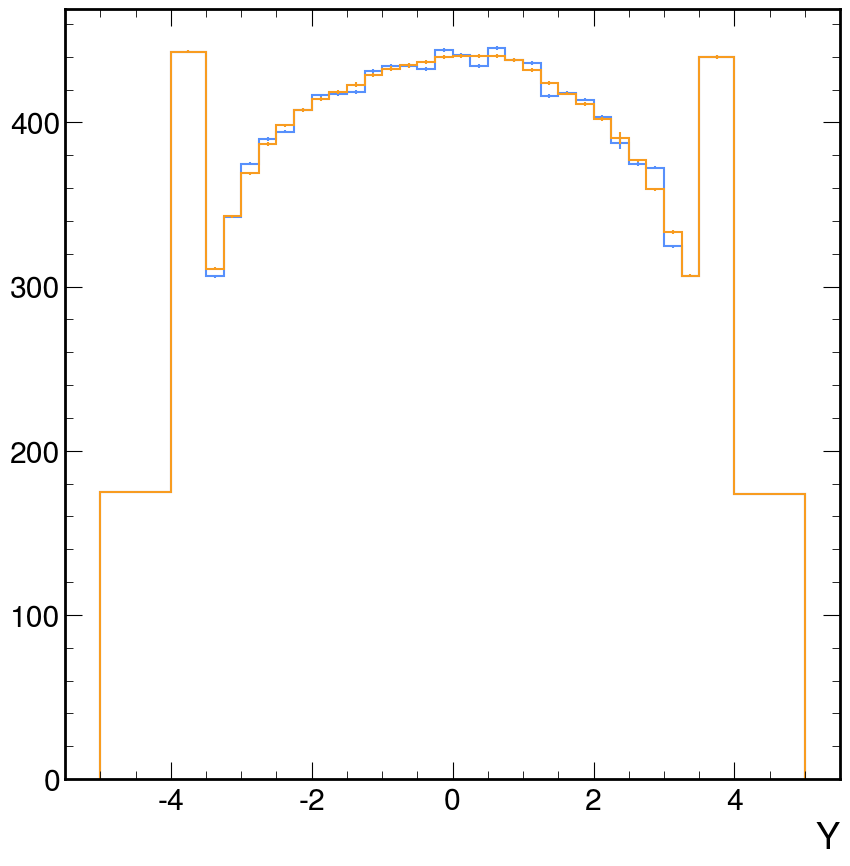

In [126]:
nnlojet_fo.project("Y").plot()
nnlojet_fo_smooth.project("Y").plot()

/opt/venv/lib/python3.12/site-packages/mplhep/error_estimation.py:49: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale


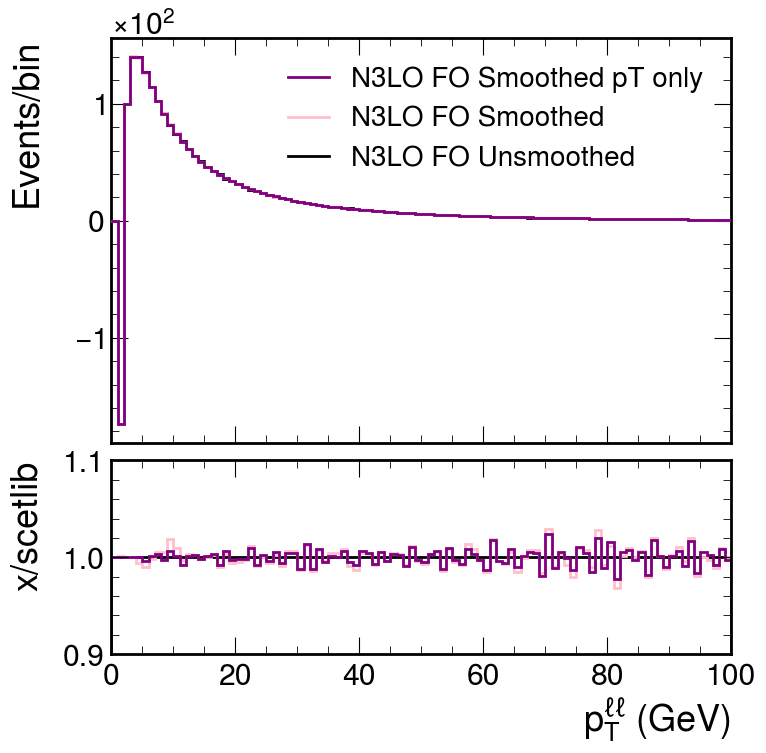

In [127]:
fig = plot_tools.makePlotWithRatioToRef(
                    hists=[
                            nnlojet_fo[{"vars" : 0}].project("qT"),
                            nnlojet_fo_smooth[{"vars" : 0}].project("qT"),                            
                            nnlojet_fo_smooth_pt[{"vars" : 0}].project("qT"),
                    ],
                    labels=[
                            "N3LO FO Unsmoothed",
                            "N3LO FO Smoothed",
                            "N3LO FO Smoothed pT only",
                           ],
                    colors=[
                            "black",
                            "pink",
                            "purple",
                           ],
                    xlabel="p$_{T}^{\ell\ell}$ (GeV)", 
                    ylabel="Events/bin",
                    rlabel="x/scetlib",
                    rrange=[0.9, 1.1],
                    nlegcols=1,
                    xlim=None, binwnorm=1.0, baseline=True, 
                    ratio_legend=False,
)

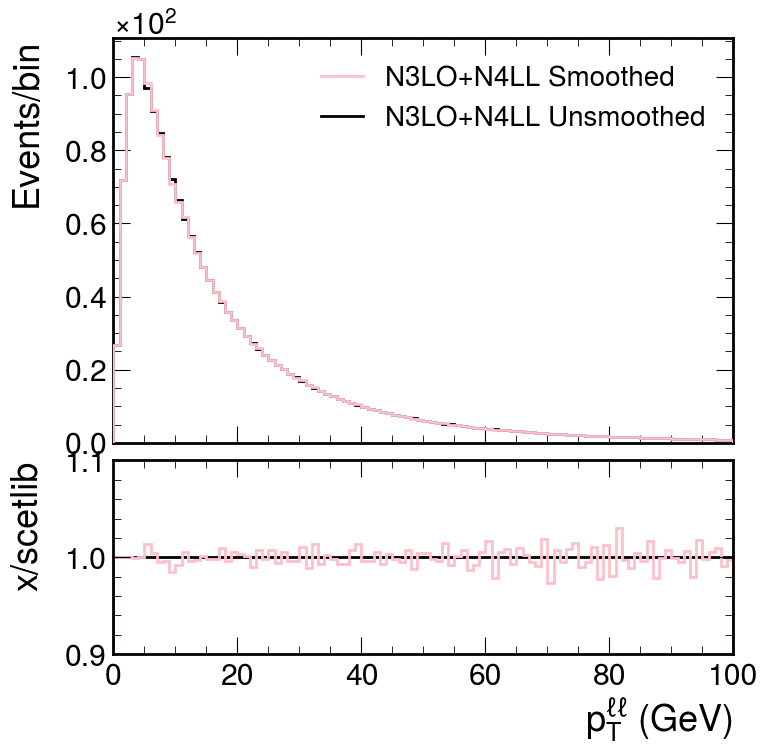

In [147]:
fig = plot_tools.makePlotWithRatioToRef(
                    hists=[
                            scetlib_nnlojet_n4lln3lo_sm[{"vars" : 0}].project("qT"),
                            scetlib_nnlojet_n4lln3lo[{"vars" : 0}].project("qT"),                            
                    ],
                    labels=[
                            "N3LO+N4LL Unsmoothed",
                            "N3LO+N4LL Smoothed",
                           ],
                    colors=[
                            "black",
                            "pink",
                           ],
                    xlabel="p$_{T}^{\ell\ell}$ (GeV)", 
                    ylabel="Events/bin",
                    rlabel="x/scetlib",
                    rrange=[0.9, 1.1],
                    nlegcols=1,
                    xlim=None, binwnorm=1.0, baseline=True, 
                    ratio_legend=False,
)

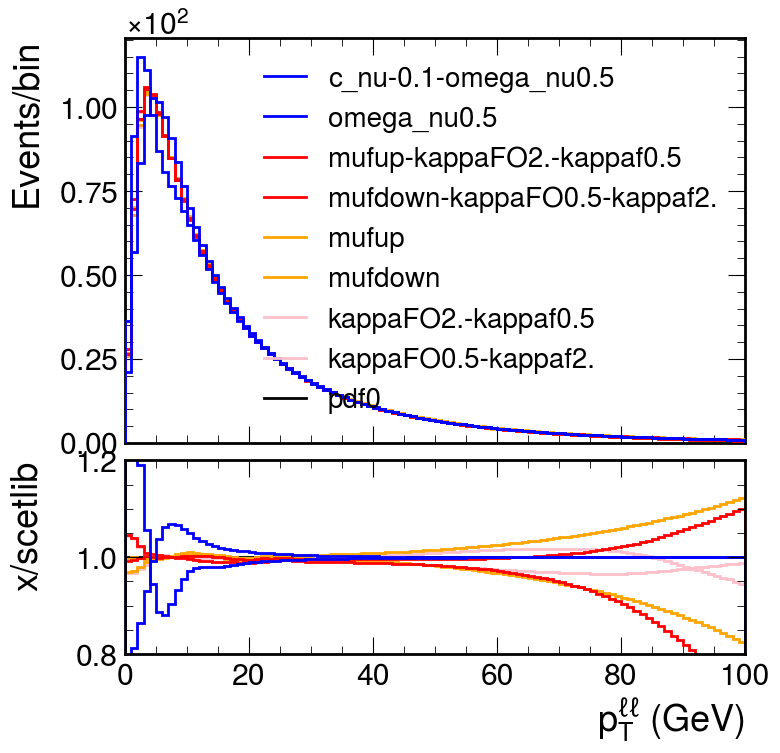

In [159]:
scale_vars = list(scetlib_nnlojet_n4lln3lo.axes["vars"])[:9]

fig = plot_tools.makePlotWithRatioToRef(
                    hists=[
                            scetlib_dyturbo_n4ll_nnlo[{"vars" : v}].project("qT") for v in scale_vars
                    ],
                    labels=scale_vars,
                    colors=[
                            "black",
                            "pink",
                            "pink",
                            "orange",
                            "orange",
                            "red",
                            "red",
                            "blue",
                            "blue",
                           ],
                    xlabel="p$_{T}^{\ell\ell}$ (GeV)", 
                    ylabel="Events/bin",
                    rlabel="x/scetlib",
                    rrange=[0.8, 1.2],
                    nlegcols=1,
                    xlim=None, binwnorm=1.0, baseline=True, 
                    ratio_legend=False,
)

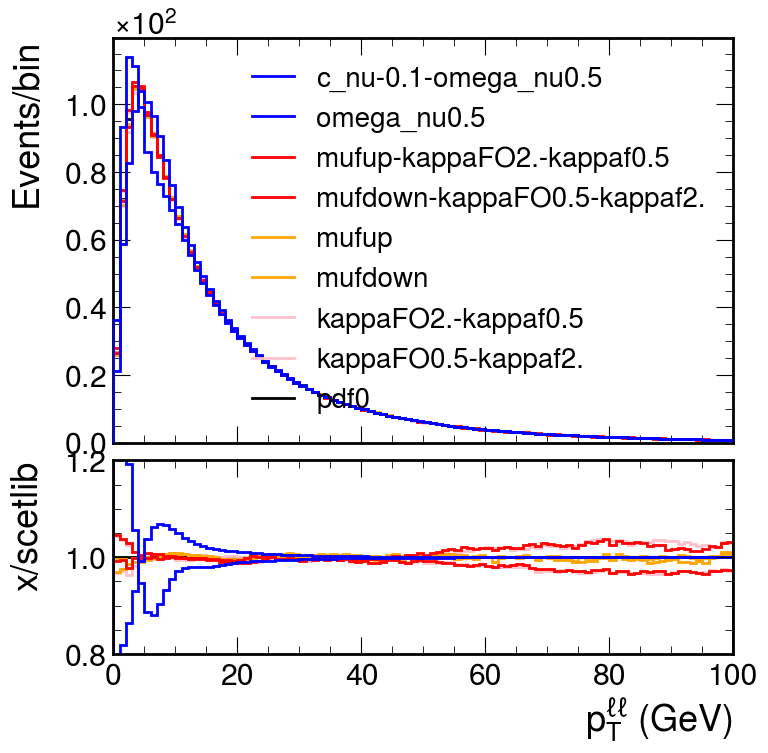

In [158]:
scale_vars = list(scetlib_nnlojet_n4lln3lo.axes["vars"])[:9]

fig = plot_tools.makePlotWithRatioToRef(
                    hists=[
                            scetlib_nnlojet_n4lln3lo_sm[{"vars" : v}].project("qT") for v in scale_vars
                    ],
                    labels=scale_vars,
                    colors=[
                            "black",
                            "pink",
                            "pink",
                            "orange",
                            "orange",
                            "red",
                            "red",
                            "blue",
                            "blue",
                           ],
                    xlabel="p$_{T}^{\ell\ell}$ (GeV)", 
                    ylabel="Events/bin",
                    rlabel="x/scetlib",
                    rrange=[0.8, 1.2],
                    nlegcols=1,
                    xlim=None, binwnorm=1.0, baseline=True, 
                    ratio_legend=False,
)

In [170]:
scetlib_n4ll = input_tools.read_scetlib_hist("/home/k/kelong/work/Generators/TheoryCorrections/SCETlib/ct18z_nplambda_n4+0ll/inclusive_Z_CT18Z_nplambda_N4+0LL_combined.pkl")
scetlib_n3lo_sing = input_tools.read_scetlib_hist("/home/k/kelong/work/Generators/TheoryCorrections/SCETlib/ct18z_nplambda_n4+0ll/inclusive_Z_CT18Z_nplambda_n3lo_sing.pkl")
scetlib_nnlo_sing = input_tools.read_scetlib_hist("/home/k/kelong/work/Generators/TheoryCorrections/SCETlib/ct18z_nplambda_scalevars/inclusive_Z_CT18Z_nplambda_scalevars_nnlo_sing_combined.pkl")
dyturbo_fo = input_tools.read_dyturbo_vars_hist("/home/k/kelong/work/Generators/TheoryCorrections/DYTURBO/nnlo-scetlibmatch/scalevariations/z0/results_z-2d-nnlo-vj-CT18ZNNLO-{scale}-scetlibmatch.txt")

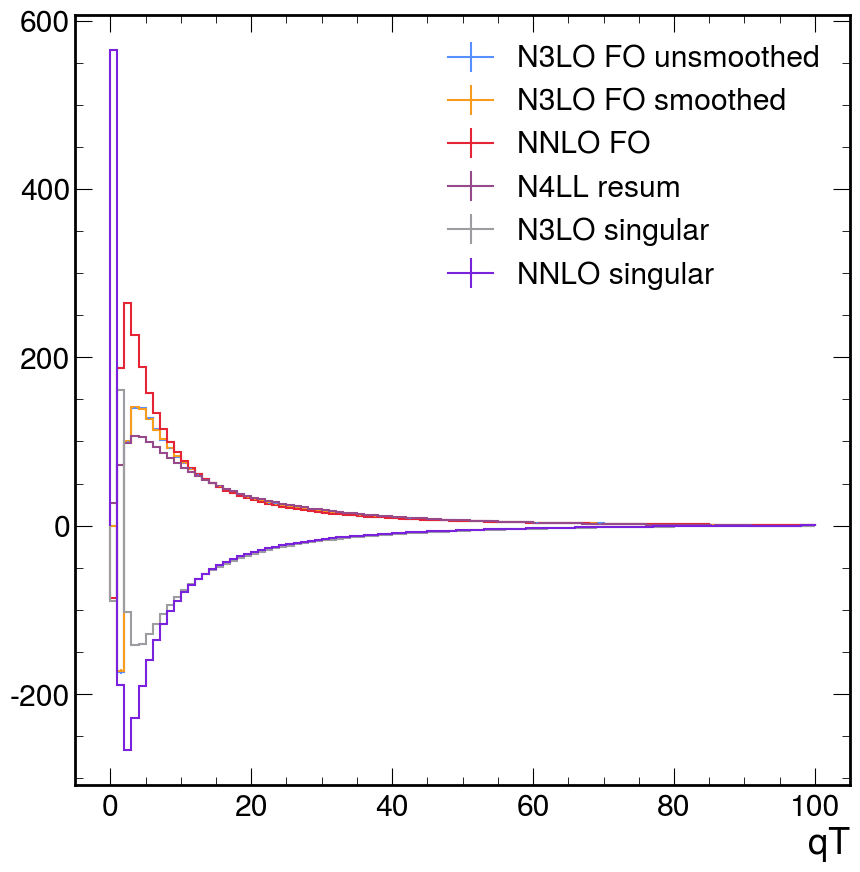

In [12]:
nnlojet_fo[{"vars" : 0}].project("qT").plot(label="N3LO FO unsmoothed")
nnlojet_fo_smooth[{"vars" : 0}].project("qT").plot(label="N3LO FO smoothed")
dyturbo_fo[{"vars" : 0}].project("qT").plot(label="NNLO FO")
scetlib_n4ll[{"vars" : 0}].project("qT").plot(label="N4LL resum")
(-1*scetlib_n3lo_sing[{"vars" : 0}]).project("qT").plot(label="N3LO singular")
(-1*scetlib_nnlo_sing[{"vars" : 0}]).project("qT").plot(label="NNLO singular")
plt.legend()

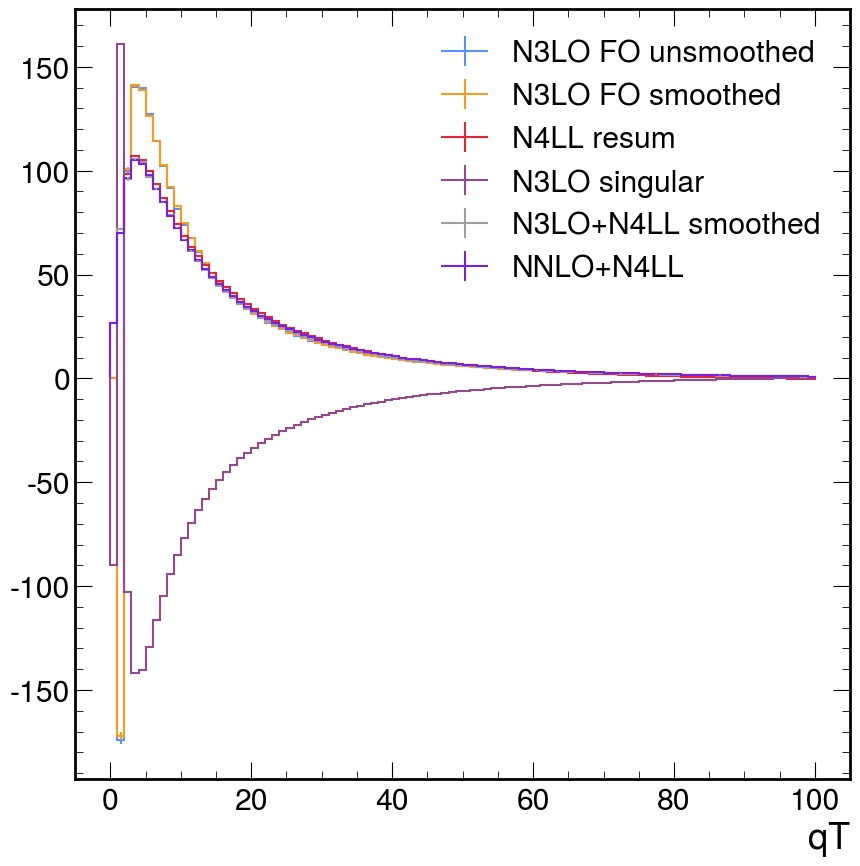

In [13]:
nnlojet_fo[{"vars" : 0}].project("qT").plot(label="N3LO FO unsmoothed")
nnlojet_fo_smooth[{"vars" : 0}].project("qT").plot(label="N3LO FO smoothed")
scetlib_n4ll[{"vars" : 0}].project("qT").plot(label="N4LL resum")
(-1*scetlib_n3lo_sing[{"vars" : 0}]).project("qT").plot(label="N3LO singular")
scetlib_nnlojet_n4lln3lo_sm[{"vars" : 0}].project("qT").plot(label="N3LO+N4LL smoothed")
scetlib_dyturbo_n4ll_nnlo[{"vars" : 0}].project("qT").plot(label="NNLO+N4LL")
plt.legend()

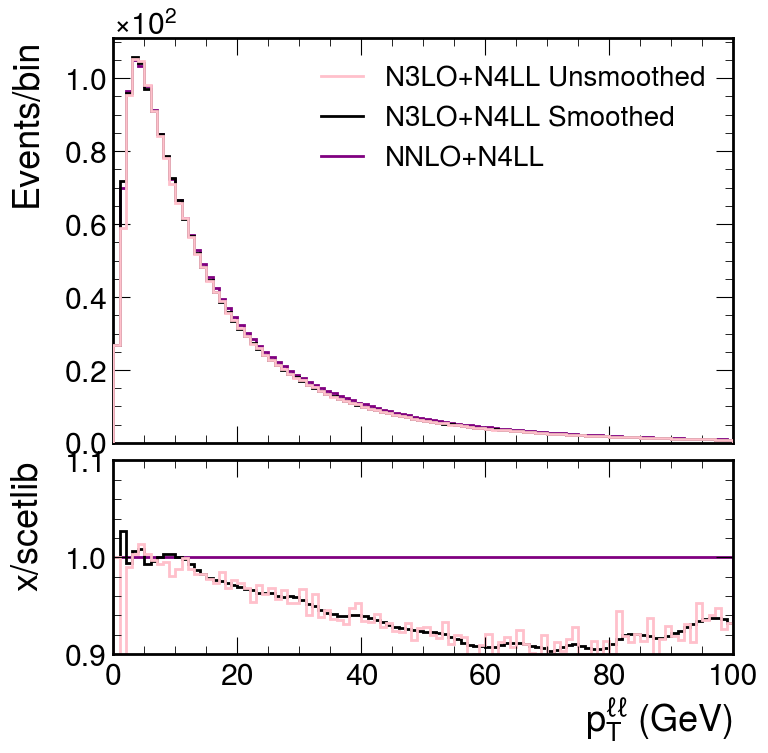

In [14]:

fig = plot_tools.makePlotWithRatioToRef(
                    hists=[
                        scetlib_dyturbo_n4ll_nnlo[{"vars" : 0}].project("qT"),
                        scetlib_nnlojet_n4lln3lo_sm[{"vars" : 0}].project("qT"),
                        scetlib_nnlojet_n4lln3lo[{"vars" : 0}].project("qT"),
                            
                    ],
                    labels=[
                            "NNLO+N4LL",
                            "N3LO+N4LL Smoothed",
                            "N3LO+N4LL Unsmoothed",
                           ],
                    colors=[
                            "purple",
                            "black",
                            "pink",
                           ],
                    xlabel="p$_{T}^{\ell\ell}$ (GeV)", 
                    ylabel="Events/bin",
                    rlabel="x/scetlib",
                    rrange=[0.9, 1.1],
                    nlegcols=1,
                    xlim=None, binwnorm=1.0, baseline=True, 
                    ratio_legend=False,
)

In [15]:
scetlib_nnlojet = read_corr("Z", "scetlib_nnlojet", 
    ["/home/k/kelong/work/Generators/TheoryCorrections/SCETlib/ct18z_nplambda_n4+0ll/inclusive_Z_CT18Z_nplambda_N4+0LL_combined.pkl",
        "/home/k/kelong/work/Generators/TheoryCorrections/SCETlib/ct18z_nplambda_n4+0ll/inclusive_Z_CT18Z_nplambda_n3lo_sing.pkl",
        "/home/k/kelong/work/Generators/TheoryCorrections/NNLOjet/Z/ZjNNLO/final/ptz",
    ],
    ["Y", "qT"],
)

In [16]:
scetlib_dyturbo = read_corr("Z", "scetlib_dyturbo", 
    ["/home/k/kelong/work/Generators/TheoryCorrections/SCETlib/ct18z_nplambda_n4+0ll/inclusive_Z_CT18Z_nplambda_N4+0LL_combined.pkl",
        "/home/k/kelong/work/Generators/TheoryCorrections/SCETlib/ct18z_nplambda_scalevars/inclusive_Z_CT18Z_nplambda_scalevars_nnlo_sing_combined.pkl",
        "/home/k/kelong/work/Generators/TheoryCorrections/DYTURBO/nnlo-scetlibmatch/scalevariations/z0/results_z-2d-nnlo-vj-CT18ZNNLO-{scale}-scetlibmatch.txt",
    ],
    ["Y", "qT"]
)

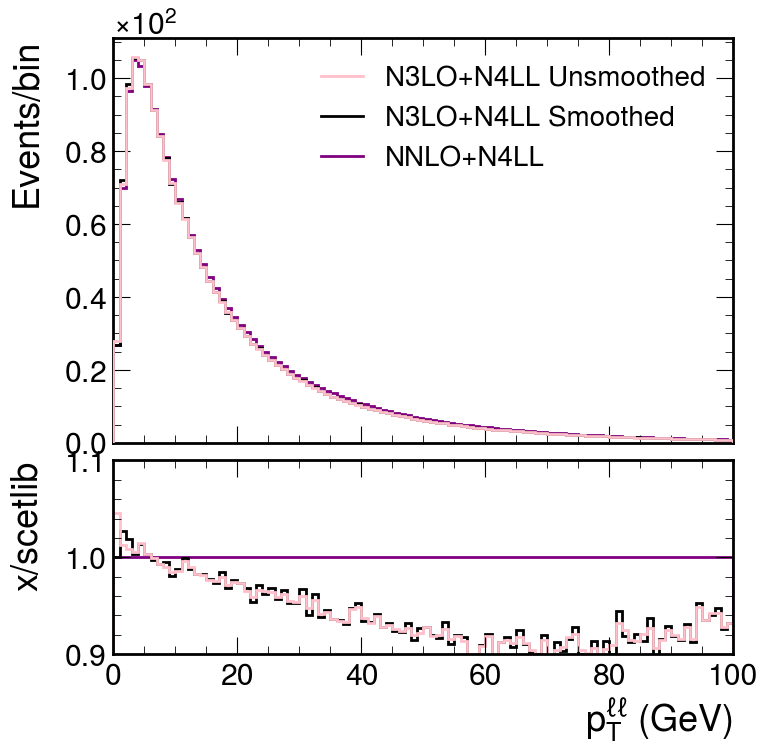

In [128]:
fig = plot_tools.makePlotWithRatioToRef(
                    hists=[
                            scetlib_dyturbo[{"vars" : 0}].project("qT"),
                            scetlib_nnlojet[{"vars" : 0}].project("qT"),
                            hsmooth[{"vars" : 0}].project("qT"),
                            
                    ],
                    labels=[
                            "NNLO+N4LL",
                            "N3LO+N4LL Smoothed",
                            "N3LO+N4LL Unsmoothed",
                           ],
                    colors=[
                            "purple",
                            "black",
                            "pink",
                           ],
                    xlabel="p$_{T}^{\ell\ell}$ (GeV)", 
                    ylabel="Events/bin",
                    rlabel="x/scetlib",
                    rrange=[0.9, 1.1],
                    nlegcols=1,
                    xlim=None, binwnorm=1.0, baseline=True, 
                    ratio_legend=False,
)

In [21]:
corrf = pickle.load(lz4.frame.open("../wremnants-data/data/TheoryCorrections/scetlib_nnlojetN4LLN3LO_pdfasCorrZ.pkl.lz4"))

In [22]:
corrf["Z"].keys()

dict_keys(['scetlib_nnlojetN4LLN3LO_pdfas_minnlo_ratio', 'scetlib_dyturboCT18Z_pdfas_minnlo_ratio', 'scetlib_dyturboCT18Z_pdfas_hist', 'minnlo_ref_hist', 'scetlib_nnlojetN4p0LLN3LO_minnlo_ratio', 'scetlib_nnlojetN4p0LLN3LO_hist'])

/opt/venv/lib/python3.12/site-packages/mplhep/error_estimation.py:49: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale
/opt/venv/lib/python3.12/site-packages/mplhep/error_estimation.py:49: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale


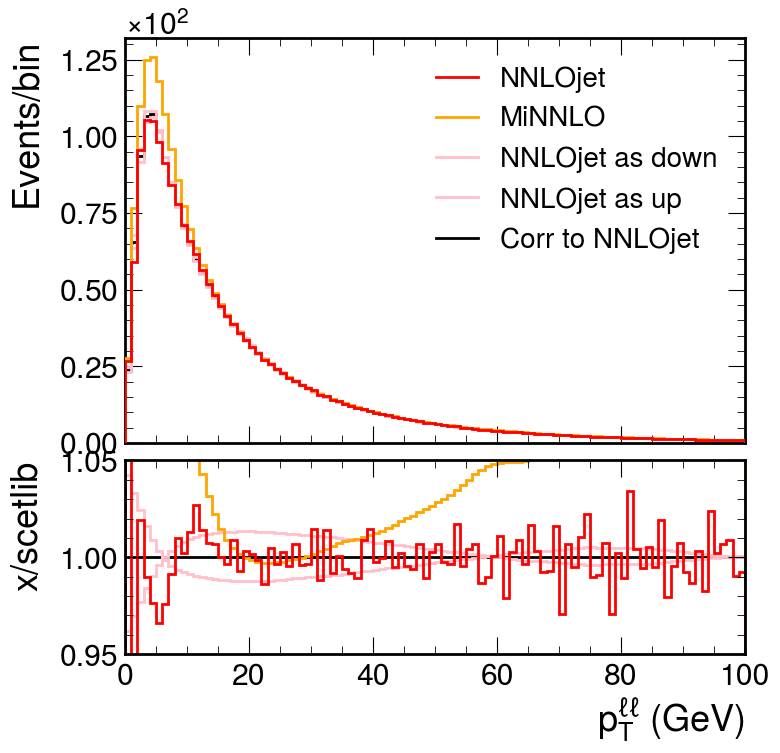

In [23]:
nnlojetas = hh.multiplyHists(corrf["Z"]["minnlo_ref_hist"], corrf["Z"]["scetlib_nnlojetN4LLN3LO_pdfas_minnlo_ratio"], flow=False)
nnlojeth = hh.multiplyHists(corrf["Z"]["minnlo_ref_hist"], corrf["Z"]["scetlib_nnlojetN4p0LLN3LO_minnlo_ratio"], flow=False)
fig = plot_tools.makePlotWithRatioToRef(
                    hists=[
                        nnlojeth[{"vars" : 0}].project("qT"),
                        nnlojetas[{"vars" : 1}].project("qT"),
                        nnlojetas[{"vars" : 2}].project("qT"),
                        corrf["Z"]["minnlo_ref_hist"].project("qT"),
                        corrf["Z"]["scetlib_nnlojetN4p0LLN3LO_hist"][{"vars" : 0}].project("qT"),
                    ],
                    labels=[
                            "Corr to NNLOjet",
                            "NNLOjet as up",
                            "NNLOjet as down",
                            "MiNNLO",
                            "NNLOjet",
                           ],
                    colors=[
                            "black",
                            "pink",
                            "pink",
                            "orange",
                            "red",
                           ],
                    xlabel="p$_{T}^{\ell\ell}$ (GeV)", 
                    ylabel="Events/bin",
                    rlabel="x/scetlib",
                    rrange=[0.95, 1.05],
                    nlegcols=1,
                    xlim=None, binwnorm=1.0, baseline=True, 
                    ratio_legend=False,
            )

/opt/venv/lib/python3.12/site-packages/mplhep/error_estimation.py:49: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale
/opt/venv/lib/python3.12/site-packages/mplhep/error_estimation.py:49: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale


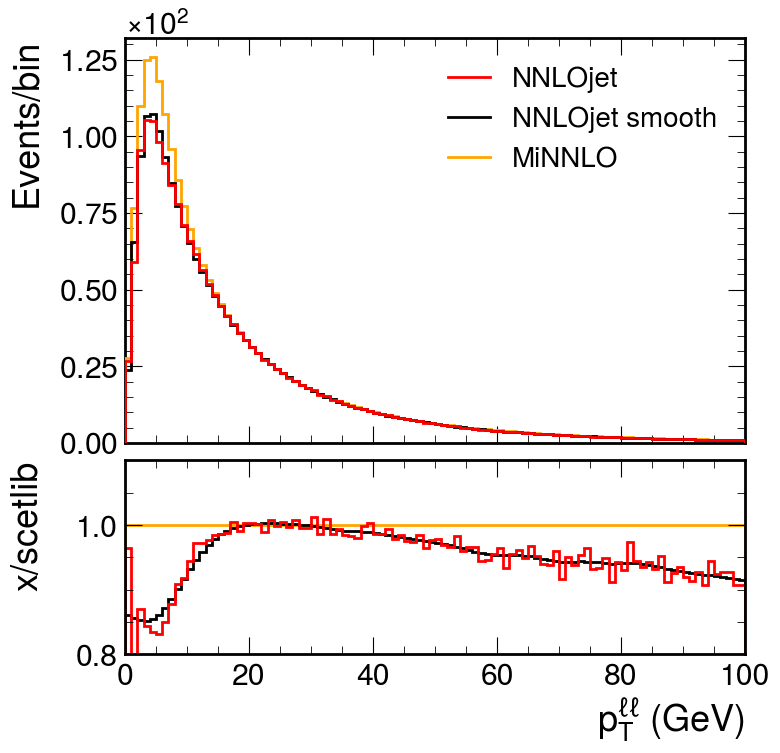

In [24]:
nnlojetas = hh.multiplyHists(corrf["Z"]["minnlo_ref_hist"], corrf["Z"]["scetlib_nnlojetN4LLN3LO_pdfas_minnlo_ratio"], flow=False)
nnlojeth = hh.multiplyHists(corrf["Z"]["minnlo_ref_hist"], corrf["Z"]["scetlib_nnlojetN4p0LLN3LO_minnlo_ratio"], flow=False)
fig = plot_tools.makePlotWithRatioToRef(
                    hists=[
                        corrf["Z"]["minnlo_ref_hist"].project("qT"),
                        nnlojeth[{"vars" : 0}].project("qT"),
                        corrf["Z"]["scetlib_nnlojetN4p0LLN3LO_hist"][{"vars" : 0}].project("qT"),
                    ],
                    labels=[
                            "MiNNLO",
                            "NNLOjet smooth",
                            "NNLOjet",
                           ],
                    colors=[
                            "orange",
                            "black",
                            "red",
                           ],
                    xlabel="p$_{T}^{\ell\ell}$ (GeV)", 
                    ylabel="Events/bin",
                    rlabel="x/scetlib",
                    rrange=[0.8, 1.1],
                    nlegcols=1,
                    xlim=None, binwnorm=1.0, baseline=True, 
                    ratio_legend=False,
            )

In [276]:
scetlib_nnlojet_n4lln3lo_wmsm = input_tools.read_matched_scetlib_nnlojet_hist(
    "/home/k/kelong/work/Generators/TheoryCorrections/SCETlib/msht20_nplambda_n4+0ll/inclusive_Wm_MSHT20_nplambda_N4+0LL.pkl",
    "/home/k/kelong/work/Generators/TheoryCorrections/SCETlib/msht20_nplambda_n4+0ll/inclusive_Wm_MSHT20_nplambda_n3lo_sing.pkl",
    "/home/k/kelong/work/Generators/TheoryCorrections/NNLOjet/Wm/WmjNNLO/ptw",
    axes=("Y", "qT"),
    zero_nons_bins=hist.tag.Slicer()[0:2],
    smooth_nnlojet=True,
)

In [277]:
scetlib_nnlojet_n4lln3lo_wm = input_tools.read_matched_scetlib_nnlojet_hist(
    "/home/k/kelong/work/Generators/TheoryCorrections/SCETlib/msht20_nplambda_n4+0ll/inclusive_Wm_MSHT20_nplambda_N4+0LL.pkl",
    "/home/k/kelong/work/Generators/TheoryCorrections/SCETlib/msht20_nplambda_n4+0ll/inclusive_Wm_MSHT20_nplambda_n3lo_sing.pkl",
    "/home/k/kelong/work/Generators/TheoryCorrections/NNLOjet/Wm/WmjNNLO/ptw",
    axes=("Y", "qT"),
    zero_nons_bins=hist.tag.Slicer()[0:2],
    smooth_nnlojet=False,
)

In [282]:
scetlib_nnlojet_n4lln3lo_wm[{"vars" : 0}]

Hist(
  Variable(array([-5.  , -4.  , -3.5 , -3.25, -3.  , -2.75, -2.5 , -2.25, -2.  ,
       -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,
        0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,  2.5 ,
        2.75,  3.  ,  3.25,  3.5 ,  4.  ,  5.  ]), name='Y'),
  Regular(100, 0, 100, name='qT'),
  storage=Weight()) # Sum: WeightedSum(value=8130.77, variance=313.429)

In [284]:
minnlow = input_tools.read_and_scale("/scratch/kelong/Analysis/w_z_gen_dists_maxFiles_m1_msht20.hdf5", "WminusmunuPostVFP", "nominal_gen")

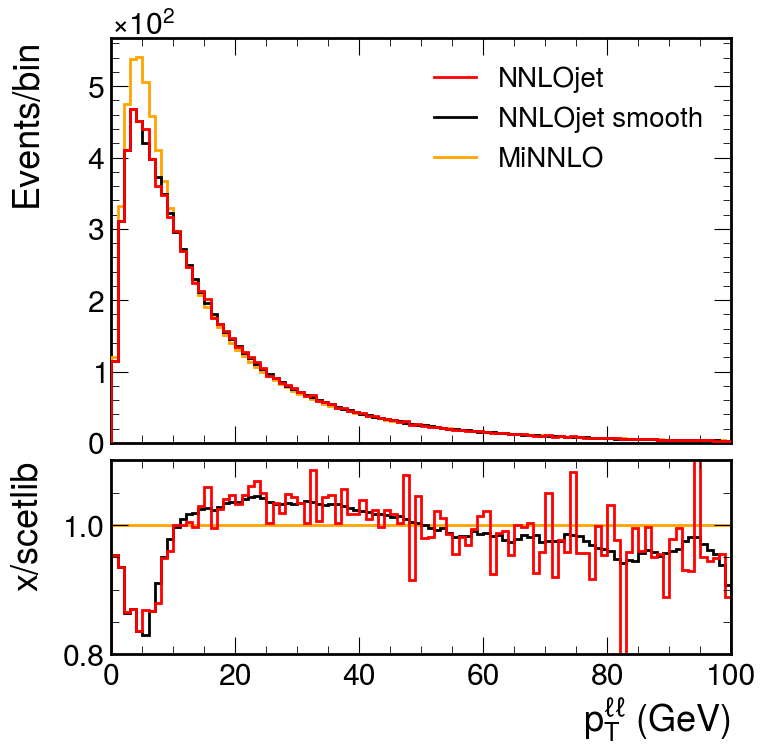

In [285]:
fig = plot_tools.makePlotWithRatioToRef(
                    hists=[
                        minnlow.project("ptVgen")[:100j],
                        scetlib_nnlojet_n4lln3lo_wmsm[{"vars" : 0}].project("qT"), 
                        scetlib_nnlojet_n4lln3lo_wm[{"vars" : 0}].project("qT"), 

                    ],
                    labels=[
                            "MiNNLO",
                            "NNLOjet smooth",
                            "NNLOjet",
                           ],
                    colors=[
                            "orange",
                            "black",
                            "red",
                           ],
                    xlabel="p$_{T}^{\ell\ell}$ (GeV)", 
                    ylabel="Events/bin",
                    rlabel="x/scetlib",
                    rrange=[0.8, 1.1],
                    nlegcols=1,
                    xlim=None, binwnorm=1.0, baseline=True, 
                    ratio_legend=False,
            )

In [256]:
nnlojet_fow = input_tools.read_nnlojet_pty_hist("/home/k/kelong/work/Generators/TheoryCorrections/NNLOjet/Wm/WmjNNLO/ptw")
nnlojet_fow_pt = input_tools.read_nnlojet_file("/home/k/kelong/work/Generators/TheoryCorrections/NNLOjet/Wm/WmjNNLO/ptw_all.dat")

In [266]:
scetlib_n4llw = input_tools.read_scetlib_hist("/home/k/kelong/work/Generators/TheoryCorrections/SCETlib/ct18z_nplambda_n4+0ll/inclusive_Wm_CT18Z_nplambda_N4+0LL_combined.pkl")
scetlib_n3lo_singw = input_tools.read_scetlib_hist("/home/k/kelong/work/Generators/TheoryCorrections/SCETlib/msht20_nplambda_n4+0ll/inclusive_Wm_MSHT20_nplambda_n3lo_sing.pkl")
scetlib_nnlo_singw = input_tools.read_scetlib_hist("/home/k/kelong/work/Generators/TheoryCorrections/SCETlib/ct18z_nplambda_scalevars/inclusive_Wm_CT18Z_nplambda_scalevars_nnlo_sing_combined.pkl")
dyturbo_fowm = input_tools.read_dyturbo_vars_hist("/home/k/kelong/work/Generators/TheoryCorrections/DYTURBO/nnlo-scetlibmatch/scalevariations/wminus/results_wm-2d-nnlo-vj-CT18ZNNLO-{scale}-scetlibmatch.txt")
dyturbo_fowp = input_tools.read_dyturbo_vars_hist("/home/k/kelong/work/Generators/TheoryCorrections/DYTURBO/nnlo-scetlibmatch/scalevariations/wplus/results_wp-2d-nnlo-vj-CT18ZNNLO-{scale}-scetlibmatch.txt")

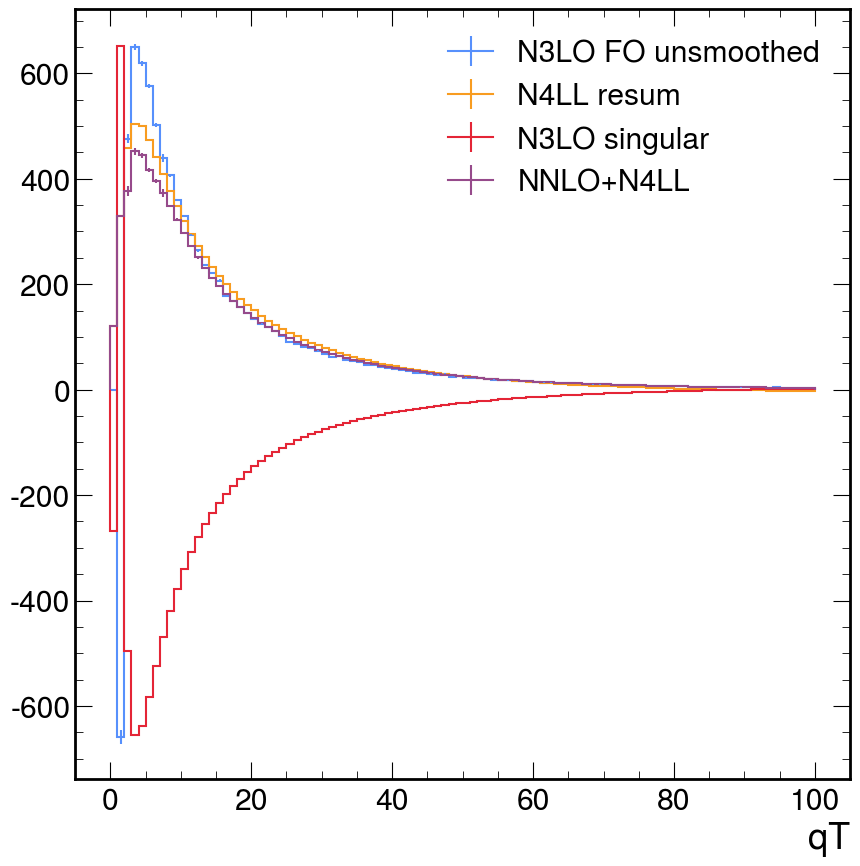

In [257]:
nnlojet_fow[{"vars" : 0}].project("qT").plot(label="N3LO FO unsmoothed")
scetlib_n4llw[{"vars" : 0}].project("qT").plot(label="N4LL resum")
(-1*scetlib_n3lo_singw[{"vars" : 0}]).project("qT").plot(label="N3LO singular")
scetlib_nnlojet_n4lln3lo_wmsm[{"vars" : 0}].project("qT").plot(label="NNLO+N4LL")
plt.legend()

In [203]:
nonsingw = hh.addHists(nnlojet_fow, -1*scetlib_n3lo_singw)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f742eba29f0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

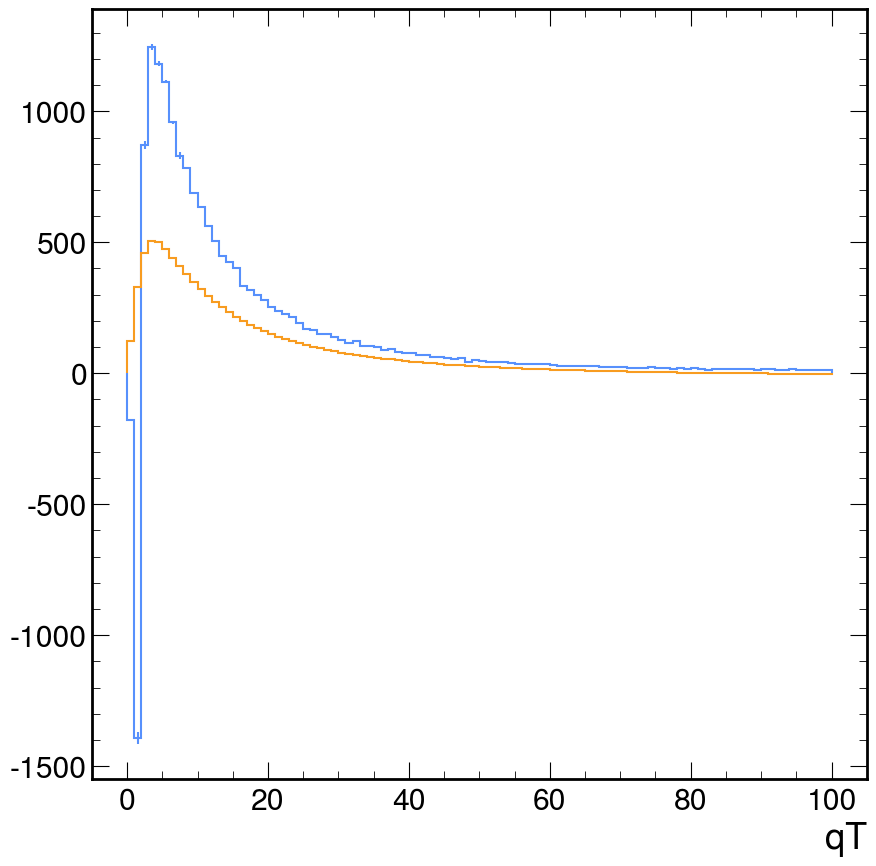

In [189]:
nonsingw[{"vars" : 0}].project("qT").plot()
scetlib_n4llw[{"vars" : 0}].project("qT").plot(label="N4LL resum")

In [251]:
nnlojet_fow = input_tools.read_nnlojet_pty_hist("/home/k/kelong/work/Generators/TheoryCorrections/NNLOjet/Wm/WmjNNLO/ptw")
scetlib_n3lo_singw = input_tools.read_scetlib_hist("/home/k/kelong/work/Generators/TheoryCorrections/SCETlib/msht20_nplambda_n4+0ll/inclusive_Wm_MSHT20_nplambda_n3lo_sing.pkl")
nonsingw = nnlojet_fow[{"vars" : 0}]+ -1*scetlib_n3lo_singw[{"vars" : 0, "Q" : 0}]


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f742be64080>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

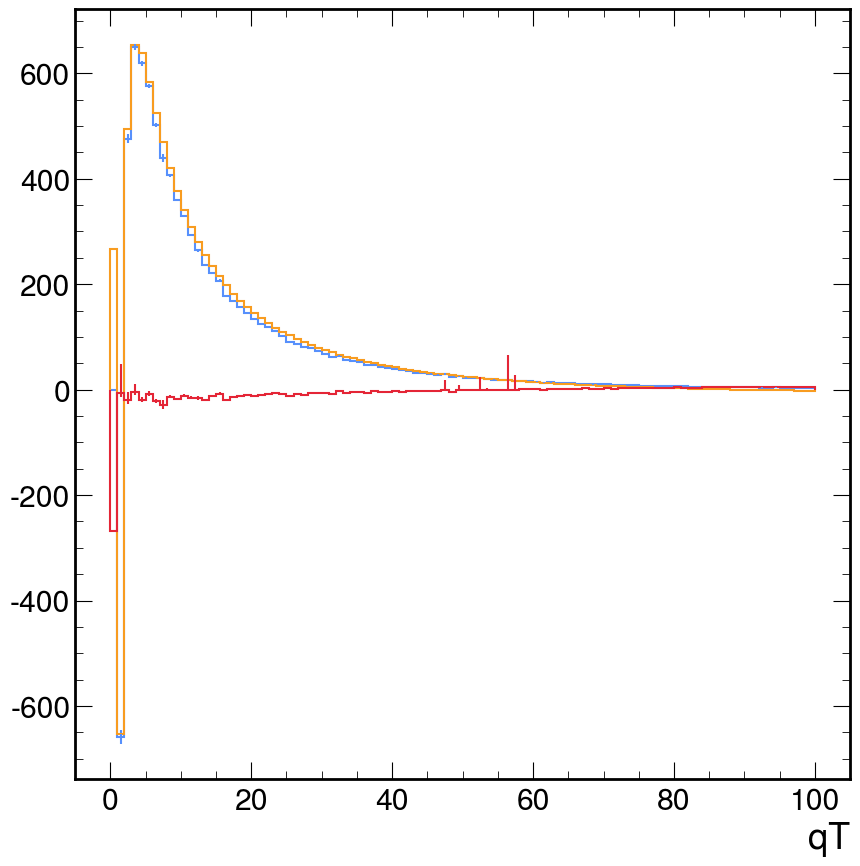

In [252]:
nnlojet_fow[{"vars" : 0}].project("qT").plot(label="N3LO FO unsmoothed")
scetlib_n3lo_singw[{"vars" : 0}].project("qT").plot(label="N3LO sing")
nonsingw.project("qT").plot()

In [232]:
nnlojet_fow[{"vars" : 0}]

Hist(
  Variable(array([-5.  , -4.  , -3.5 , -3.25, -3.  , -2.75, -2.5 , -2.25, -2.  ,
       -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,
        0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,  2.5 ,
        2.75,  3.  ,  3.25,  3.5 ,  4.  ,  5.  ]), name='Y'),
  Regular(100, 0, 100, name='qT'),
  storage=Weight()) # Sum: WeightedSum(value=7899.09, variance=498.582)

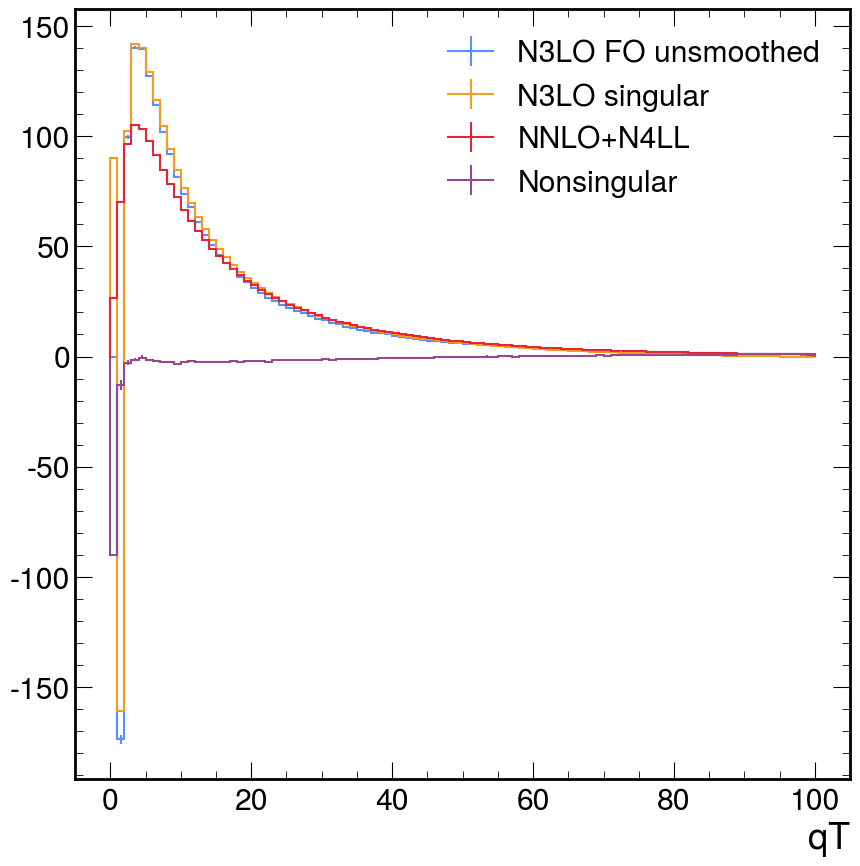

In [245]:
nnlojet_fo[{"vars" : 0}].project("qT").plot(label="N3LO FO unsmoothed")
scetlib_n3lo_sing[{"vars" : 0}].project("qT").plot(label="N3LO singular")
scetlib_dyturbo_n4ll_nnlo[{"vars" : 0}].project("qT").plot(label="NNLO+N4LL")
(nnlojet_fo[{"vars" : 0}]+-1*scetlib_n3lo_sing[{"vars" : 0, "Q" : 0}]).project("qT").plot(label="Nonsingular")
plt.legend()

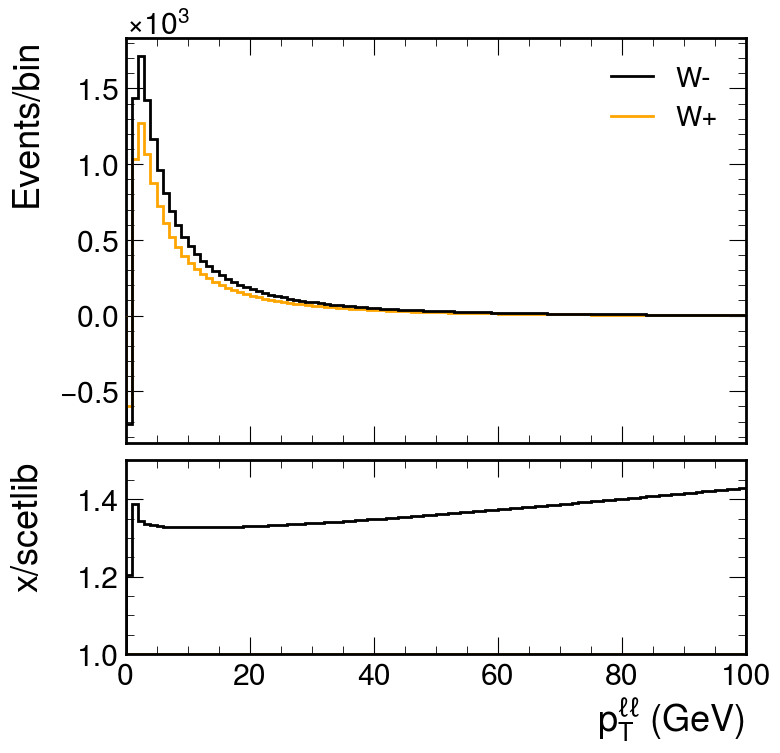

In [274]:
fig = plot_tools.makePlotWithRatioToRef(
                    hists=[
                        dyturbo_fowm[{"vars" : 0}].project("qT"), 
                        dyturbo_fowp[{"vars" : 0}].project("qT"), 

                    ],
                    labels=[
                            "W+",
                            "W-",
                           ],
                    colors=[
                            "orange",
                            "black",
                           ],
                    xlabel="p$_{T}^{\ell\ell}$ (GeV)", 
                    ylabel="Events/bin",
                    rlabel="x/scetlib",
                    rrange=[1.0, 1.5],
                    nlegcols=1,
                    xlim=None, binwnorm=1.0, baseline=True, 
                    ratio_legend=False,
            )